# Utilities for large scale climate data analysis
The `xarrayutils.utils` module contains several functions that have proven useful in several of my day to day projects with both observational and model data.

## Linear regression
One of the operations many scientists do is calculating a linear trend along a specified dimension (e.g. time) on each grid point of a dataset. `linear_trend` makes this very easy. For demonstration purposes lets load some monthly gridded Argo data from [APDRC](http://apdrc.soest.hawaii.edu/dods/public_data/Argo_Products/monthly_mean/monthly_mixed_layer.info)

In [1]:
import xarray as xr
import numpy as np

%matplotlib inline

In [2]:
path = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/Argo_Products/monthly_mean/monthly_mixed_layer'
ds = xr.open_dataset(path, use_cftime=True)
ds

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 120, time: 240)
Coordinates:
  * time     (time) object 2001-01-15 00:00:00 ... 2020-12-15 00:00:00
  * lat      (lat) float64 -88.5 -85.5 -82.5 -79.5 -76.5 ... 79.5 82.5 85.5 88.5
  * lon      (lon) float64 1.5 4.5 7.5 10.5 13.5 ... 349.5 352.5 355.5 358.5
Data variables:
    mld      (time, lat, lon) float32 ...
    smld     (time, lat, lon) float32 ...
    nmld     (time, lat, lon) float32 ...
    ild      (time, lat, lon) float32 ...
    sild     (time, lat, lon) float32 ...
    nild     (time, lat, lon) float32 ...
    ttd      (time, lat, lon) float32 ...
    sttd     (time, lat, lon) float32 ...
    nttd     (time, lat, lon) float32 ...
    blt      (time, lat, lon) float32 ...
    sblt     (time, lat, lon) float32 ...
    nblt     (time, lat, lon) float32 ...
    tid      (time, lat, lon) float32 ...
    stid     (time, lat, lon) float32 ...
    ntid     (time, lat, lon) float32 ...
    mlt      (time, lat, lon) float32 ...
    smlt     (time, lat, lon) float32 ...
    nmlt     (time, lat, lon) float32 ...
    mls      (time, lat, lon) float32 ...
    smls     (time, lat, lon) float32 ...
    nmls     (time, lat, lon) float32 ...
Attributes:
    title:          3x3 bin-averaged Mixed Layer Monthly mean (from 2001)
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/projects/Argo/index.html
    history:        Fri Jun 05 09:22:38 HST 2020 : imported by GrADS Data Ser...

Lets find out how much the salinity in each grid point changed over the full period (20 years)

In [3]:
from xarrayutils.utils import linear_trend

In [4]:
# create an array 
salinity_regressed = linear_trend(ds.mls, 'time')
salinity_regressed

/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


<xarray.Dataset>
Dimensions:    (lat: 60, lon: 120)
Coordinates:
  * lat        (lat) float64 -88.5 -85.5 -82.5 -79.5 ... 79.5 82.5 85.5 88.5
  * lon        (lon) float64 1.5 4.5 7.5 10.5 13.5 ... 349.5 352.5 355.5 358.5
Data variables:
    slope      (lat, lon) float64 nan nan nan nan ... 0.08067 0.07533 -0.005028
    intercept  (lat, lon) float64 nan nan nan nan ... 20.33 22.07 22.88 32.38
    r_value    (lat, lon) float64 nan nan nan nan nan ... 1.0 0.9608 1.0 -0.116
    p_value    (lat, lon) float64 nan nan nan nan nan ... nan 0.03919 nan 0.884
    std_err    (lat, lon) float64 nan nan nan nan ... 0.0 0.01646 0.0 0.03045

Now we can plot the slope as a map

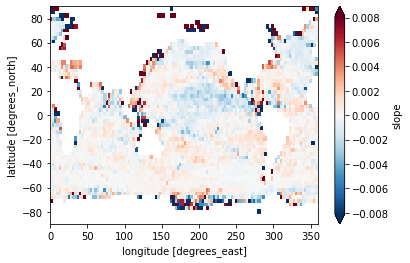

In [5]:
salinity_regressed.slope.plot(robust=True)

`linear_trend` converts the dimension over which to integrate into logical indicies, so the units of the plot above are (salinity/timestep of the original product), so here PSS/month.

## Correlation maps

But what about a bit more complex task? Lets find out how mixedlayer salinity and temperature correlate. For this we use `xr_linregress` (for which `linear_trend` is just a thin wrapper):

In [6]:
from xarrayutils.utils import linear_trend, xr_linregress

In [7]:
tempxsalt = xr_linregress(ds.mlt, ds.mls, dim='time')

/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


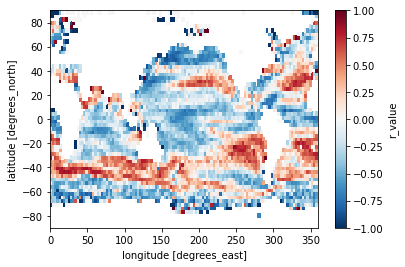

In [8]:
tempxsalt.r_value.plot()

This works in any dimension the dataset has:

In [9]:
tempxsalt = xr_linregress(ds.mlt, ds.mls, dim='lon')

/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juliusbusecke/miniconda/envs/xarrayutils-docs/lib/python3.9/site-packages/xarray/core/computation.py:700: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


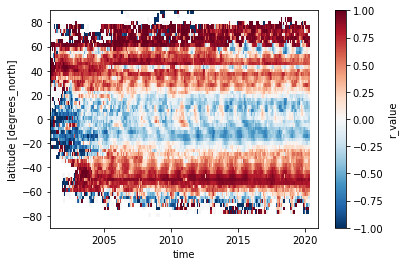

In [10]:
tempxsalt.r_value.plot(x='time')

This map shows that in lower latitudes spatial patterns of salinity are generally anticorrlated with temperature and vice versa in the high latitudes.

## Hatch sign agreement

It can often be useful to indicate if the sign along an averaged (or otherwise aggregated) dimension. For instance to show if forced changes have a consistent sign in reference to a multi-member mean. `sign_agreement` makes this easy. Consider this synthetic example:

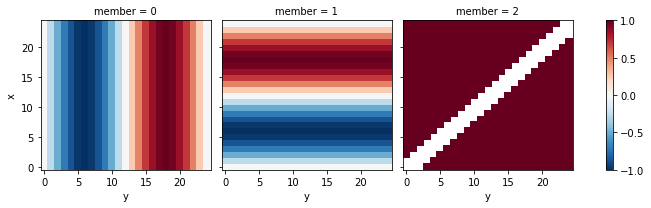

In [29]:
x = np.linspace(-np.pi, np.pi, 25)
y = np.linspace(-np.pi, np.pi, 25)
xx, yy = np.meshgrid(x,y)

data1 = np.sin(xx)
data2 = np.sin(yy)
data3 = np.ones_like(xx)

np.fill_diagonal(data3,np.nan)
np.fill_diagonal(data3[1:],np.nan)
np.fill_diagonal(data3[:,1:],np.nan)
np.fill_diagonal(data3[:,2:],np.nan)

da = xr.DataArray(np.array([data1, data2, data3]), dims=['member','x', 'y'])

da.plot(col='member')

Taking the mean of these fields, suggests that values increase in the upper-left, upper-right, lower-right quadrant, and the missing values in the third layer distort the mean.

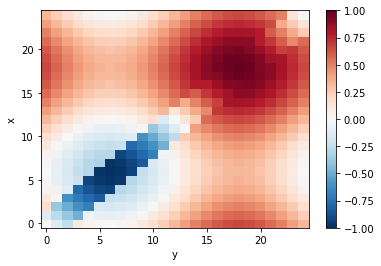

In [32]:
da.mean('member').plot()

Lets produce a mask to see where all elements along the `member` dimension have the same sign:

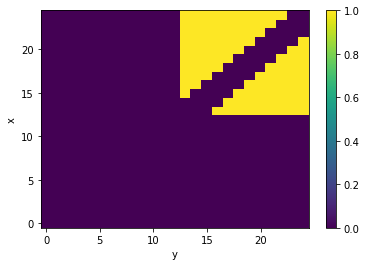

In [33]:
from xarrayutils.utils import sign_agreement

sign_agreement(da, da.mean('member'), 'member', threshold=1.0).plot()

You could use this information to indicate the areas of the average, where the members do not agree by hatching:

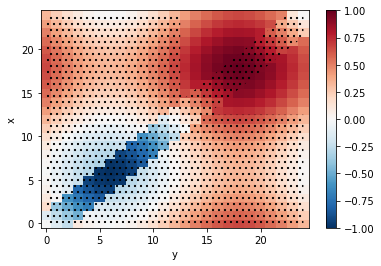

In [34]:
da.mean('member').plot()
sign_agreement(
    da, da.mean('member'), 'member'
).plot.contourf(
    colors='none',
    hatches=['..', None],
    levels=[0,0.5],
    add_colorbar=False
)